# PROJECT 1 DATA 200

## Linh Nguyen

1. 	Import the data into a Jupyter notebook and print the first 5 rows.

In [5]:
import pandas as pd
film_df = pd.read_csv('IMDB Top 250 Movies.csv')
print(film_df.head(5))

   rank                      name  year  rating               genre  \
0     1  The Shawshank Redemption  1994     9.3               Drama   
1     2             The Godfather  1972     9.2         Crime,Drama   
2     3           The Dark Knight  2008     9.0  Action,Crime,Drama   
3     4     The Godfather Part II  1974     9.0         Crime,Drama   
4     5              12 Angry Men  1957     9.0         Crime,Drama   

  certificate run_time                                            tagline  \
0           R   2h 22m  Fear can hold you prisoner. Hope can set you f...   
1           R   2h 55m                         An offer you can't refuse.   
2       PG-13   2h 32m                                    Why So Serious?   
3           R   3h 22m       All the power on earth can't change destiny.   
4    Approved   1h 36m  Life Is In Their Hands -- Death Is On Their Mi...   

      budget  box_office                                              casts  \
0   25000000    28884504  Tim R

2. 	Retrieve general information about the data using info.

In [22]:
general_data = film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


3. 	Create a set of descriptive statistics for the data.

In [20]:
desc_stats = film_df.describe()
desc_stats

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


4. 	Determine whether the tabular data is TidyData.

In [41]:
def checkvariables(film_df):
    print("Column names:", film_df.columns)
    print(film_df.isnull().sum())
def checkobservations(film_df):
    print("Number of duplicate rows:", film_df.duplicated().sum())
    print("Number of unique rows:", film_df.drop_duplicates().shape[0])
def checktidydata(film_df):
    print("Check for missing values in columns:")
    missing_values = checkvariables(film_df)
    checkobservations(film_df)
    print(missing_values)
checktidydata(film_df)

Check for missing values in columns:
Column names: Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
       'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers'],
      dtype='object')
rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64
Number of duplicate rows: 0
Number of unique rows: 250
None


The dataset is TidyData because 
- each column is its own variable (e.g: rank, name, year, rating, genre, etc.)
- each row forms an observation as it provides the necessary information about a specific movie in the Top 250 IMDB
- all values of the same variable is in one single column in a single table

6. Within your dataset, group the data based upon a variable and calculate 3 different aggregations. If your data are not suitable to grouping, just calculate the 3 aggregations for the whole dataset. What do these aggregations suggest about the data?

In [30]:
grouped_data = film_df.groupby('genre').agg(mean_rating=('rating', 'mean'),total_movies=('name', 'count'),max_year=('year', 'max')
)
print(grouped_data)

                          mean_rating  total_movies  max_year
genre                                                        
Action,Adventure             8.300000             2      1989
Action,Adventure,Comedy      8.100000             1      1926
Action,Adventure,Drama       8.700000             5      2019
Action,Adventure,Fantasy     8.380000             5      2021
Action,Adventure,Mystery     8.300000             1      1959
...                               ...           ...       ...
Horror,Mystery,Thriller      8.500000             1      1960
Horror,Sci-Fi                8.500000             1      1979
Mystery,Romance,Thriller     8.300000             1      1958
Mystery,Thriller             8.366667             3      2010
Western                      8.350000             2      1968

[104 rows x 3 columns]


7. 	Create two different types of visualizations with your dataset. These must be different kinds of visualizations (ex. scatterplot and histogram, not two histograms). Label them appropriately. Outline what they mean.

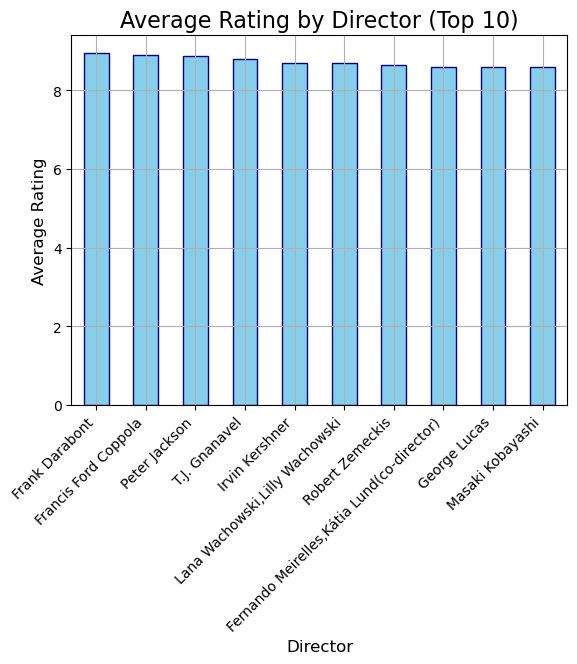

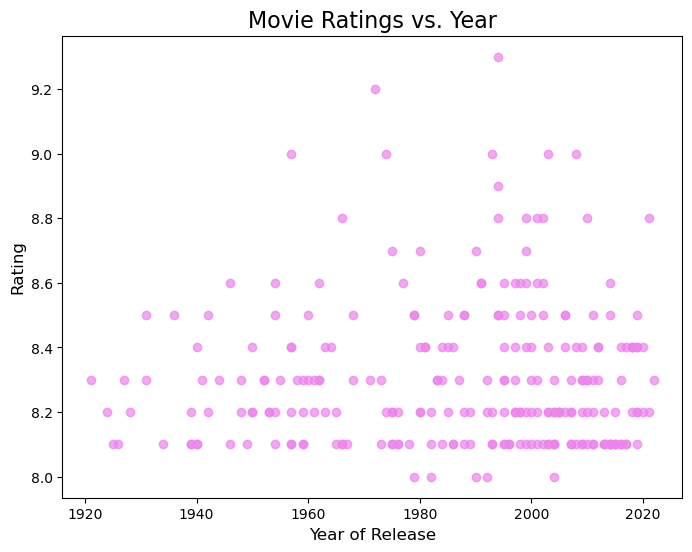

In [23]:
import pandas as pd
film_df = pd.read_csv('IMDB Top 250 Movies.csv')
import matplotlib.pyplot as plt

# 1. Histogram of Average Ratings for Top 10 Directors 
director_avg_rating = film_df.groupby('directors')['rating'].mean().sort_values(ascending=False).head(10)
director_avg_rating.plot(kind='bar', color='skyblue', edgecolor='navy')
plt.title('Average Rating by Director (Top 10)', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()
#The plot shows the Top 10 directors and their average ratings from the 250 list. The x values show the directors in the descending order
#and y values show average ratings of the films that are in the Top 250. It looks like their average ratings are consistently around 8.

# 2. Scatter plot of Rating vs. Year
plt.figure(figsize=(8, 6))
plt.scatter(data=film_df, x='year', y='rating', color='violet', alpha=0.7)
plt.title('Movie Ratings vs. Year', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()
#The scatterplot shows the release year and ratings. The x values contains the years from 1920-2020 and the y values 
#show the ratings of the top 250 films. The dots represent the films. Seems like films from 1920-2020 have consistent ratings within the 8 range.

8.	Examining your data and determine if a relationship exists between two of the variables. If your data are not suited to that task, determine if a general trend or pattern is present. Write up your findings (250 words).


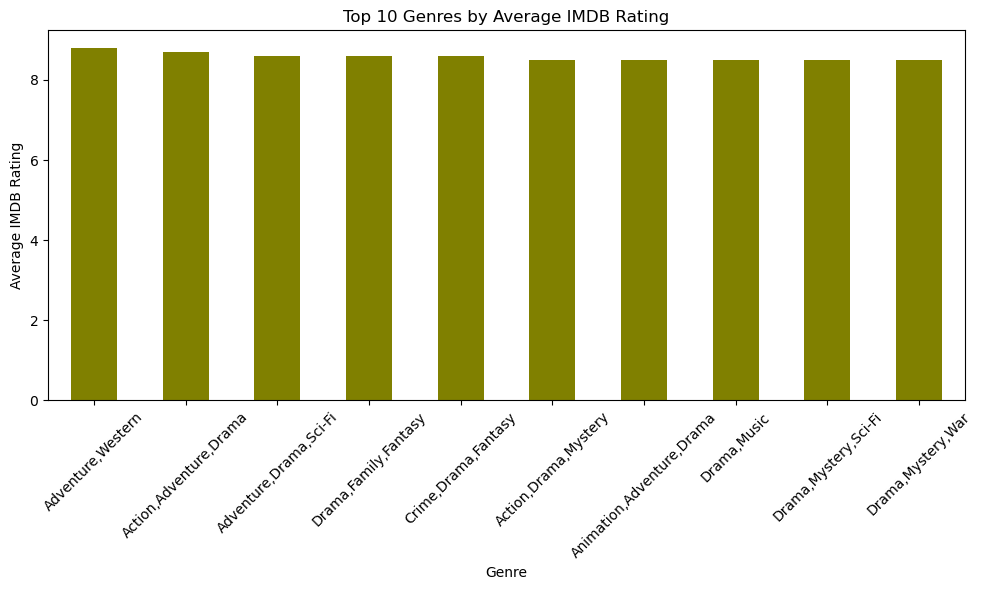

In [21]:
import matplotlib.pyplot as plt
genre_rating = film_df.groupby('genre')['rating'].mean().sort_values(ascending=False)
top_10_genres = genre_rating.head(10)

#Plot
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar', color='olive')
plt.title('Top 10 Genres by Average IMDB Rating')
plt.xlabel('Genre')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()